In [2]:
pd.__version__

'1.5.2'

# The White Lotus
**Episode 1 (Arrivals)**

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams

In [3]:
data = pd.read_excel('data.xlsx', sheet_name='episode1')
data

,initiator,responder,dialogue
0,PASSENGER 1,SHANE,You headed home? Yeah We were at the Amanari. ...
1,OLIVIA,PAULA,"Oh my God, who are these people? So, these tw..."
2,NICOLE,OLIVIA,"Hey, girls. What, Mom? Liv, come up front. I..."
3,ARMOND,LANI,"Here they come. Wave, Lani. There we are. Wa..."
4,BELINDA,NICOLE,Welcome. Thank you.
...,...,...,...
89,OLIVIA,QUINN,"Quinn, what are you doing in there? Are you fa..."
90,MARK,NICOLE,"Shit. Nicole, it’s the doctor. I told you, tod..."
91,MARK,NURSE,"Mark? This is he. Hi, do you have a minute f..."
92,NICOLE,MARK,"It’s gonna be okay, Mark. It’s… it’s gonna be ..."


In [4]:
df = (data
 .assign(sorted_pairs=lambda df_: df_.apply(lambda df_: '-'.join(sorted([df_['initiator'], df_['responder']])), axis=1))
 .assign(weight=lambda df_: df_.groupby(['sorted_pairs'])['sorted_pairs'].transform('count'))
 .assign(dialogue=lambda df_: df_.groupby(['sorted_pairs'])['dialogue'].transform(lambda df_: ' '.join(df_.unique())))
 .drop_duplicates('sorted_pairs')
 .drop(columns='sorted_pairs')
#  .sort_values('weight', ascending=False)
)
df

,initiator,responder,dialogue,weight
0,PASSENGER 1,SHANE,You headed home? Yeah We were at the Amanari. ...,1
1,OLIVIA,PAULA,"Oh my God, who are these people? So, these tw...",7
2,NICOLE,OLIVIA,"Hey, girls. What, Mom? Liv, come up front. I...",3
3,ARMOND,LANI,"Here they come. Wave, Lani. There we are. Wa...",6
4,BELINDA,NICOLE,Welcome. Thank you.,1
5,ARMOND,NICOLE,"Mr. and Mrs.. Hello. I’m Armond, the resort ma...",1
6,ARMOND,RACHEL,I’m presuming Mr. Shane and Mrs. Rachel? Oh! ...,3
7,ARMOND,TANYA,Are you Ms. MacQoowod? Quoid. One syllable. ...,3
8,ARMOND,BELINDA,"Belinda, Ms. Macuhwad is in need of treatment....",2
9,TANYA,BELINDA,"Oh, no. I just… Really? Are you sure? I would...",5


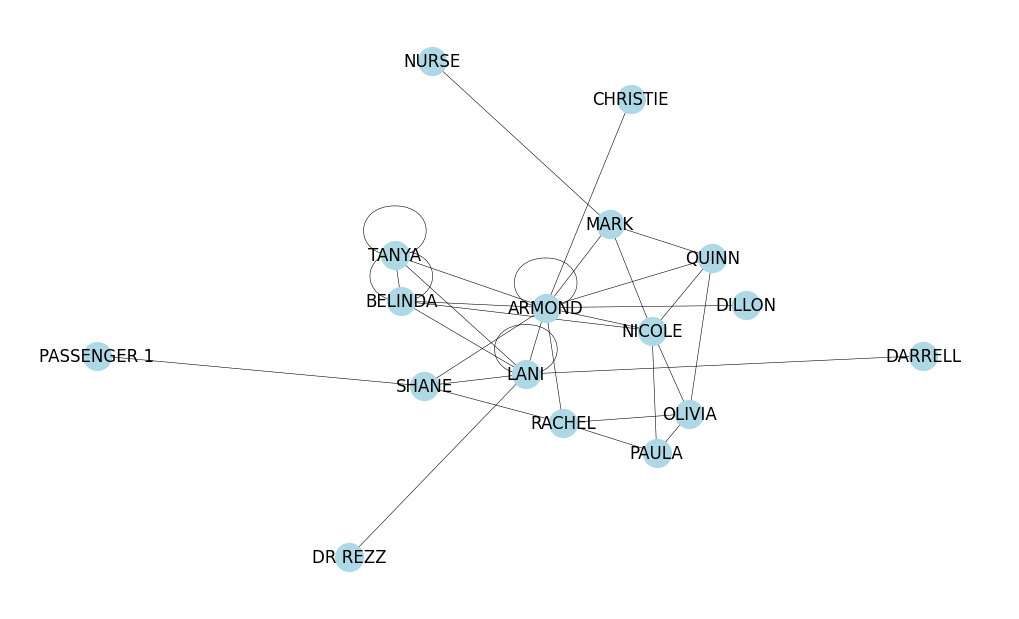

In [5]:
def draw_graph(G, img_size=(10,6), k_dist=0.8):
    plt.figure(figsize=img_size)
    pos = nx.spring_layout(G, k=k_dist)
    nx.draw(G, pos , with_labels = True, width=0.4, node_color='lightblue', node_size=400)

G = nx.from_pandas_edgelist(df, source='initiator', target='responder', edge_attr=['weight'])
draw_graph(G, k_dist=0.9)

In [6]:
# show nodes in network
G.nodes

NodeView(('PASSENGER 1', 'SHANE', 'OLIVIA', 'PAULA', 'NICOLE', 'ARMOND', 'LANI', 'BELINDA', 'RACHEL', 'TANYA', 'QUINN', 'DARRELL', 'MARK', 'DILLON', 'CHRISTIE', 'DR REZZ', 'NURSE'))

In [7]:
# count nodes
len(G.nodes)

17

In [8]:
# slice network
list(G.nodes)[:5]

['PASSENGER 1', 'SHANE', 'OLIVIA', 'PAULA', 'NICOLE']

In [9]:
G.nodes(1)

NodeDataView({'PASSENGER 1': None, 'SHANE': None, 'OLIVIA': None, 'PAULA': None, 'NICOLE': None, 'ARMOND': None, 'LANI': None, 'BELINDA': None, 'RACHEL': None, 'TANYA': None, 'QUINN': None, 'DARRELL': None, 'MARK': None, 'DILLON': None, 'CHRISTIE': None, 'DR REZZ': None, 'NURSE': None}, data=1)

In [10]:
# show edges
G.edges

EdgeView([('PASSENGER 1', 'SHANE'), ('SHANE', 'RACHEL'), ('SHANE', 'ARMOND'), ('SHANE', 'LANI'), ('OLIVIA', 'PAULA'), ('OLIVIA', 'NICOLE'), ('OLIVIA', 'RACHEL'), ('OLIVIA', 'QUINN'), ('PAULA', 'NICOLE'), ('PAULA', 'RACHEL'), ('NICOLE', 'BELINDA'), ('NICOLE', 'ARMOND'), ('NICOLE', 'QUINN'), ('NICOLE', 'MARK'), ('ARMOND', 'LANI'), ('ARMOND', 'RACHEL'), ('ARMOND', 'TANYA'), ('ARMOND', 'BELINDA'), ('ARMOND', 'MARK'), ('ARMOND', 'QUINN'), ('ARMOND', 'ARMOND'), ('ARMOND', 'DILLON'), ('ARMOND', 'CHRISTIE'), ('LANI', 'TANYA'), ('LANI', 'LANI'), ('LANI', 'DARRELL'), ('LANI', 'BELINDA'), ('LANI', 'DR REZZ'), ('BELINDA', 'TANYA'), ('BELINDA', 'BELINDA'), ('TANYA', 'TANYA'), ('QUINN', 'MARK'), ('MARK', 'NURSE')])

In [11]:
# count edges
len(G.edges)

33

In [14]:
nx.closeness_centrality(G)

{'PASSENGER 1': 0.36363636363636365,
 'SHANE': 0.5517241379310345,
 'OLIVIA': 0.42105263157894735,
 'PAULA': 0.41025641025641024,
 'NICOLE': 0.5517241379310345,
 'ARMOND': 0.7272727272727273,
 'LANI': 0.5517241379310345,
 'BELINDA': 0.5333333333333333,
 'RACHEL': 0.5161290322580645,
 'TANYA': 0.48484848484848486,
 'QUINN': 0.5161290322580645,
 'DARRELL': 0.36363636363636365,
 'MARK': 0.5161290322580645,
 'DILLON': 0.43243243243243246,
 'CHRISTIE': 0.43243243243243246,
 'DR REZZ': 0.36363636363636365,
 'NURSE': 0.34782608695652173}

In [12]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
print(dmax)

12


In [ ]:
plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")

In [13]:
degree_centrality = nx.degree_centrality(G)

In [14]:
degree_centrality

{'PASSENGER 1': 0.0625,
 'SHANE': 0.25,
 'OLIVIA': 0.25,
 'PAULA': 0.1875,
 'NICOLE': 0.375,
 'ARMOND': 0.75,
 'LANI': 0.5,
 'BELINDA': 0.375,
 'RACHEL': 0.25,
 'TANYA': 0.3125,
 'QUINN': 0.25,
 'DARRELL': 0.0625,
 'MARK': 0.25,
 'DILLON': 0.0625,
 'CHRISTIE': 0.0625,
 'DR REZZ': 0.0625,
 'NURSE': 0.0625}

In [15]:
dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))

{'ARMOND': 0.75,
 'LANI': 0.5,
 'NICOLE': 0.375,
 'BELINDA': 0.375,
 'TANYA': 0.3125,
 'SHANE': 0.25,
 'OLIVIA': 0.25,
 'RACHEL': 0.25,
 'QUINN': 0.25,
 'MARK': 0.25,
 'PAULA': 0.1875,
 'PASSENGER 1': 0.0625,
 'DARRELL': 0.0625,
 'DILLON': 0.0625,
 'CHRISTIE': 0.0625,
 'DR REZZ': 0.0625,
 'NURSE': 0.0625}

In [18]:
deg_ser = pd.Series(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))
deg_ser

ARMOND         0.7500
LANI           0.5000
NICOLE         0.3750
BELINDA        0.3750
TANYA          0.3125
SHANE          0.2500
OLIVIA         0.2500
RACHEL         0.2500
QUINN          0.2500
MARK           0.2500
PAULA          0.1875
PASSENGER 1    0.0625
DARRELL        0.0625
DILLON         0.0625
CHRISTIE       0.0625
DR REZZ        0.0625
NURSE          0.0625
dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), dpi=150)

for font in ['xtick.color', 'ytick.color', 'axes.labelcolor']:
    plt.rcParams[font] = 'blue'

(deg_ser
.plot.barh(ax=ax, color='#696969')
)

In [20]:
deg_ser

ARMOND         0.7500
LANI           0.5000
NICOLE         0.3750
BELINDA        0.3750
TANYA          0.3125
SHANE          0.2500
OLIVIA         0.2500
RACHEL         0.2500
QUINN          0.2500
MARK           0.2500
PAULA          0.1875
PASSENGER 1    0.0625
DARRELL        0.0625
DILLON         0.0625
CHRISTIE       0.0625
DR REZZ        0.0625
NURSE          0.0625
dtype: float64

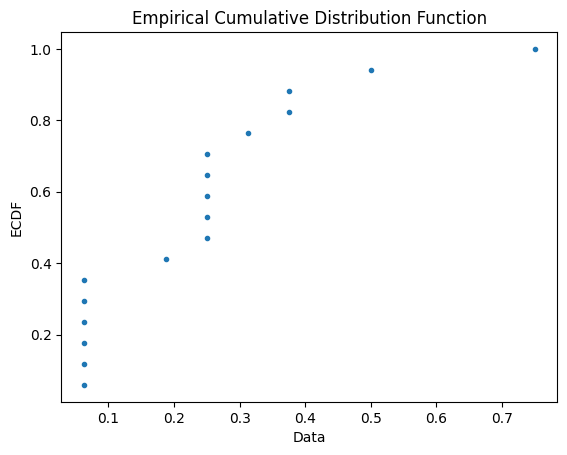

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
data = deg_ser

# Calculate the ECDF
x = np.sort(data)
y = np.arange(1, len(data)+1) / len(data)

# Plot the ECDF
plt.plot(x, y, marker='.', linestyle='none')

# Add axis labels and title
plt.xlabel('Data')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function')

# Show the plot
plt.show()

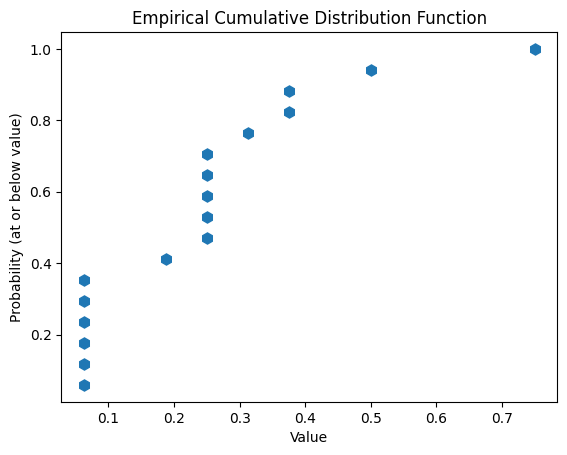

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
data = deg_ser

# Create a figure and axis object
fig, ax = plt.subplots()

# Calculate the ECDF
x = np.sort(data)
y = np.arange(1, len(data)+1) / len(data)

# Plot the ECDF
ax.plot(x, y, marker='h', markersize=8, linestyle='none')

# Add axis labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Probability (at or below value)')
ax.set_title('Empirical Cumulative Distribution Function')

# Show the plot
plt.show()


ECDF stands for Empirical Cumulative Distribution Function. It is a non-parametric estimator of the cumulative distribution function (CDF) of a random variable based on a sample of the data.

To construct the ECDF, we first sort the observations in our sample from smallest to largest. Then, for each observation, we calculate the proportion of the observations that are less than or equal to it, which gives us the cumulative probability of that observation. Finally, we plot these cumulative probabilities against the sorted observations to create the ECDF.

The ECDF is a useful tool for visualizing the distribution of a dataset, especially when we don't know the underlying distribution of the data. It provides a way to estimate the probability of observing a value less than or equal to a particular value in the data, which can be used for statistical inference, hypothesis testing, and model selection.

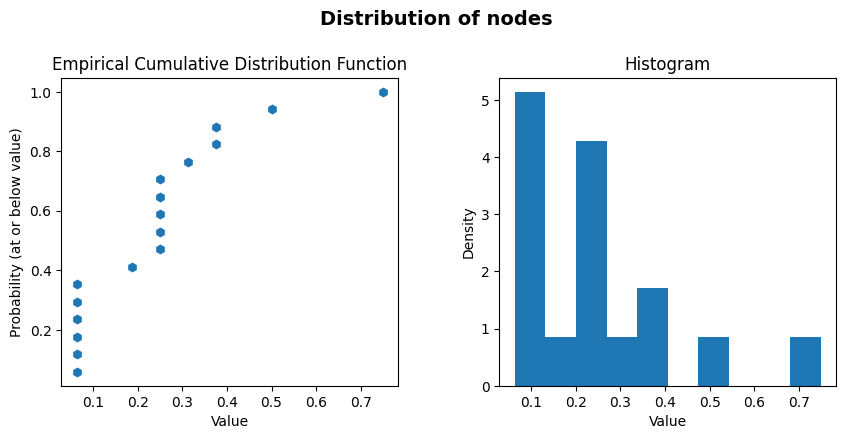

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
data = deg_ser

# Create a figure and axis objects for the two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

futura_font_path = 'graphfonts/Futura/futura-medium-condensed.ttf'
futura_font = fm.FontProperties(fname=futura_font_path, size=12)
paypal_font_path = 'graphfonts/Paypal/PayPalSansSmall-Regular.ttf'
paypal_font = fm.FontProperties(fname=paypal_font_path, size=7)

# Calculate the ECDF and plot it on the left subplot
x = np.sort(data)
y = np.arange(1, len(data)+1) / len(data)
ax1.plot(x, y, marker='h', linestyle='none')
ax1.set_xlabel('Value')
ax1.set_ylabel('Probability (at or below value)')
ax1.set_title('Empirical Cumulative Distribution Function')

# Plot the histogram on the right subplot
ax2.hist(data, bins=10, density=True)
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.set_title('Histogram')

# Add a centered supertitle to represent both plots
fig.suptitle('Distribution of nodes', fontsize=14, fontweight='bold', y=1.05)

# Adjust spacing between subplots
fig.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


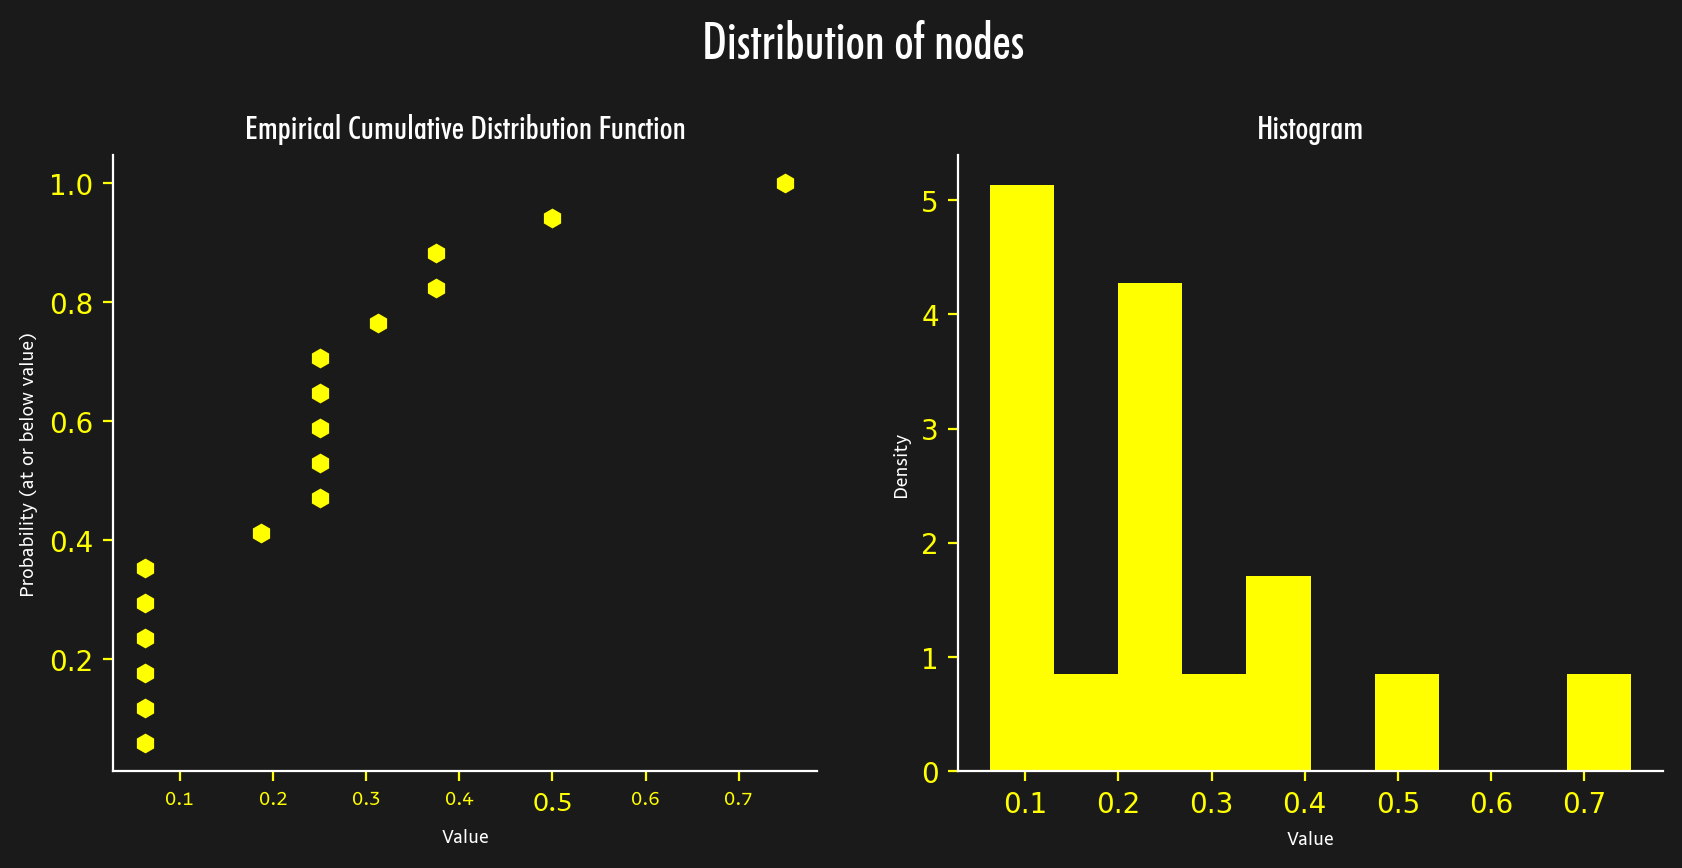

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set font properties
futura_font_path = 'graphfonts/Futura/futura-medium-condensed.ttf'
futura_font = fm.FontProperties(fname=futura_font_path, size=12)
paypal_font_path = 'graphfonts/Paypal/PayPalSansSmall-Regular.ttf'
paypal_font = fm.FontProperties(fname=paypal_font_path, size=7)

# Set figure and axes properties
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), facecolor='#1a1a1a', dpi=200)
ax1.tick_params(axis='both', colors='yellow', labelsize=10)
ax1.set_facecolor('#1a1a1a')
ax1.set_title('Empirical Cumulative Distribution Function', fontproperties=futura_font, color='white')
ax1.set_xlabel('Value', fontproperties=paypal_font, color='white')
ax1.set_ylabel('Probability (at or below value)', fontproperties=paypal_font, color='white')

ax2.tick_params(axis='both', colors='yellow', labelsize=10)
ax2.set_facecolor('#1a1a1a')
ax2.set_title('Histogram', fontproperties=futura_font, color='white')
ax2.set_xlabel('Value', fontproperties=paypal_font, color='white')
ax2.set_ylabel('Density', fontproperties=paypal_font, color='white')

for label in ax1.get_xticklabels():
    label.set_fontproperties(paypal_font)
    label.set_color('yellow')

for label in ax1.get_yticklabels():
    label.set_fontproperties(paypal_font)
    label.set_fontsize(10)
    label.set_color('yellow')

# set spine color
for ax in [ax1, ax2]:
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')

# Set the visibility of the spines on the top and left to off
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Generate some random data
data = deg_ser

# Calculate the ECDF and plot it on the left subplot
x = np.sort(data)
y = np.arange(1, len(data)+1) / len(data)
ax1.plot(x, y, marker='h', linestyle='none', color='yellow')

# Plot the histogram on the right subplot
ax2.hist(data, bins=10, density=True, color='yellow')

# Add a centered supertitle to represent both plots
fig.suptitle('Distribution of nodes', fontsize=18, fontweight='bold', fontproperties=futura_font, color='white', y=1.05)

# Show the plot
plt.show()


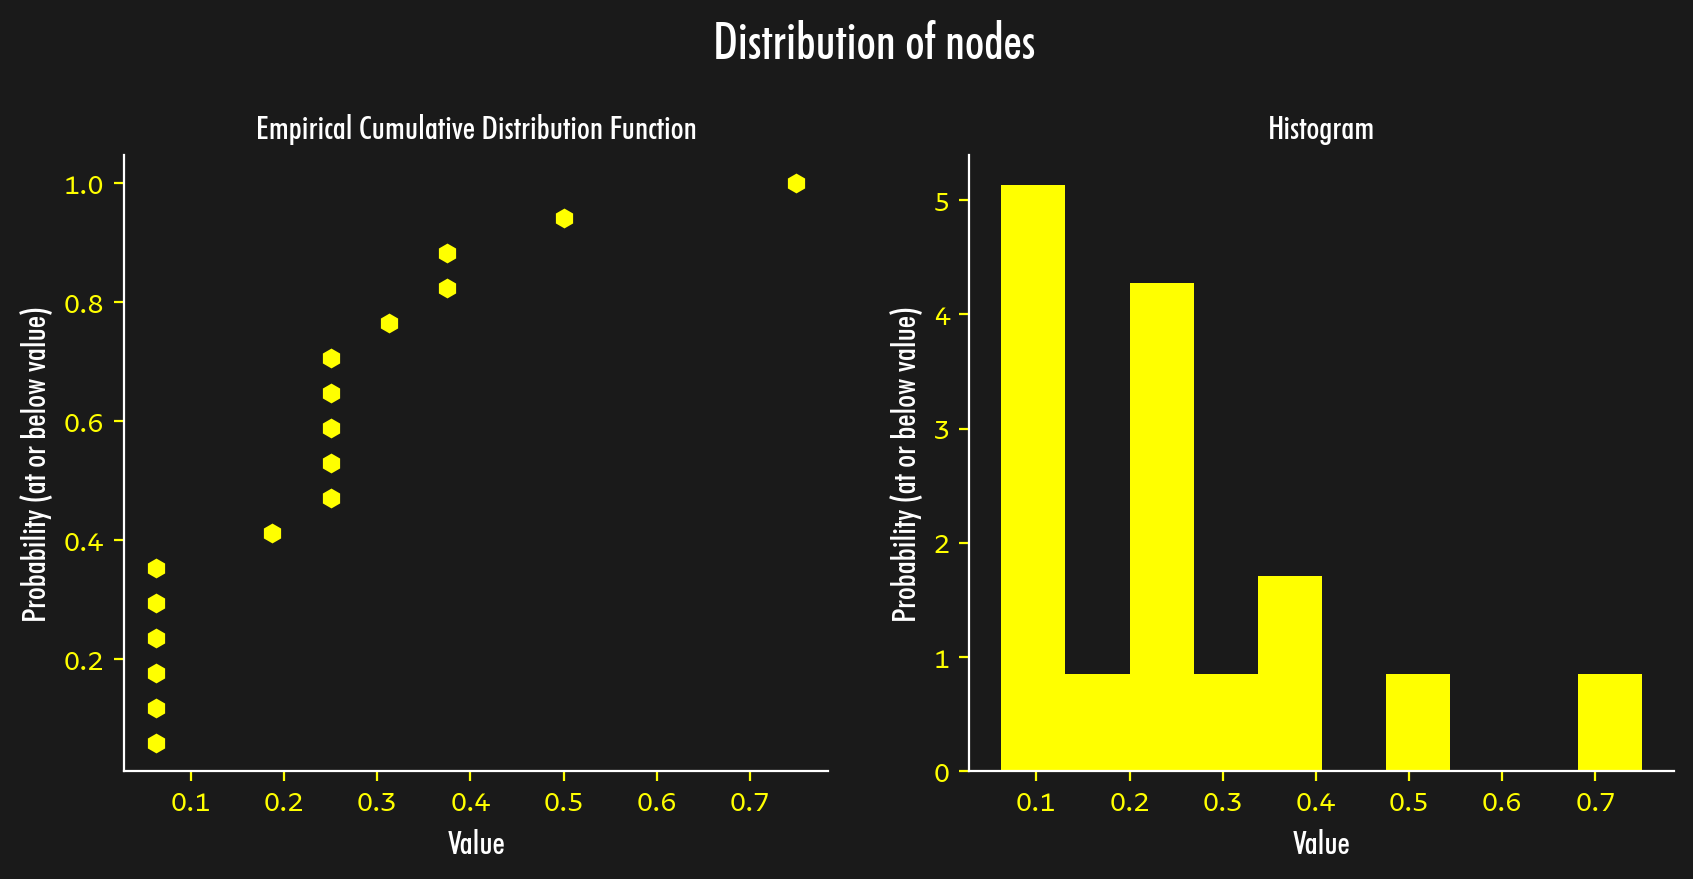

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set font properties
futura_font_path = 'graphfonts/Futura/futura-medium-condensed.ttf'
futura_font = fm.FontProperties(fname=futura_font_path, size=12)
paypal_font_path = 'graphfonts/Paypal/PayPalSansSmall-Regular.ttf'
paypal_font = fm.FontProperties(fname=paypal_font_path, size=7)

# Set figure and axes properties
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), facecolor='#1a1a1a', dpi=200)
for ax in [ax1, ax2]:
    ax.tick_params(axis='both', colors='yellow', labelsize=10)
    ax.set_facecolor('#1a1a1a')
    ax.set_xlabel('Value', fontproperties=futura_font, color='white')
    ax.set_ylabel('Probability (at or below value)', fontproperties=futura_font, color='white')

    for label in ax.get_xticklabels():
        label.set_fontproperties(paypal_font)
        label.set_fontsize(10)
        label.set_color('yellow')

    for label in ax.get_yticklabels():
        label.set_fontproperties(paypal_font)
        label.set_fontsize(10)
        label.set_color('yellow')

    # set spine color
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax1.set_title('Empirical Cumulative Distribution Function', fontproperties=futura_font, color='white')
ax2.set_title('Histogram', fontproperties=futura_font, color='white')

# Generate some random data
data = deg_ser

# Calculate the ECDF and plot it on the left subplot
x = np.sort(data)
y = np.arange(1, len(data)+1) / len(data)
ax1.plot(x, y, marker='h', linestyle='none', color='yellow')

# Plot the histogram on the right subplot
ax2.hist(data, bins=10, density=True, color='yellow')

# Add a centered supertitle to represent both plots
fig.suptitle('Distribution of nodes', fontsize=18, fontweight='bold', fontproperties=futura_font, color='white', y=1.05)

# Show the plot
plt.show()


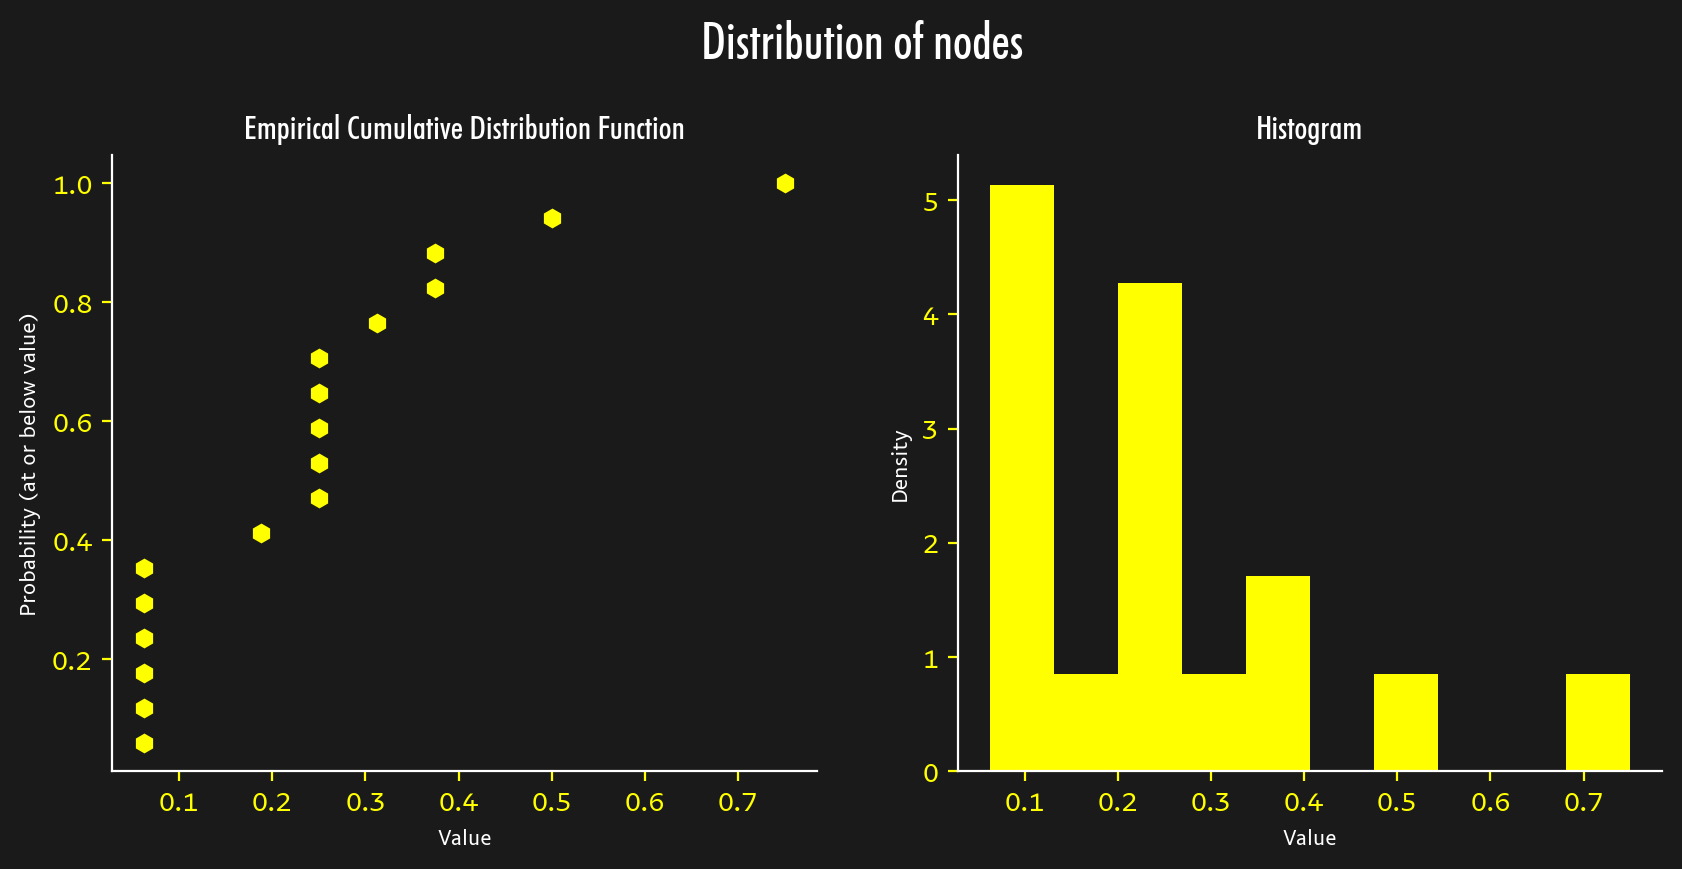

In [13]:
# THIS ONE!

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set font properties
futura_font_path = 'graphfonts/Futura/futura-medium-condensed.ttf'
futura_font = fm.FontProperties(fname=futura_font_path, size=12)
paypal_font_path = 'graphfonts/Paypal/PayPalSansSmall-Regular.ttf'
paypal_font = fm.FontProperties(fname=paypal_font_path)

# Set figure and axes properties
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), facecolor='#1a1a1a', dpi=200)
ax1.tick_params(axis='both', colors='yellow', labelsize=10)
ax1.set_facecolor('#1a1a1a')
ax1.set_title('Empirical Cumulative Distribution Function', fontproperties=futura_font, color='white')
ax1.set_xlabel('Value', fontproperties=paypal_font, color='white', fontsize=8)
ax1.set_ylabel('Probability (at or below value)', fontproperties=paypal_font, color='white', fontsize=8)

ax2.tick_params(axis='both', colors='yellow', labelsize=10)
ax2.set_facecolor('#1a1a1a')
ax2.set_title('Histogram', fontproperties=futura_font, color='white')
ax2.set_xlabel('Value', fontproperties=paypal_font, color='white', fontsize=8)
ax2.set_ylabel('Density', fontproperties=paypal_font, color='white', fontsize=8)

for label in ax1.get_xticklabels()+ax2.get_xticklabels():
    label.set_fontproperties(paypal_font)
    label.set_fontsize(10)
    label.set_color('yellow')

for label in ax1.get_yticklabels():
    label.set_fontproperties(paypal_font)
    label.set_fontsize(10)
    label.set_color('yellow')

for label in ax2.get_yticklabels():
    label.set_fontproperties(paypal_font)
    label.set_fontsize(10)
    label.set_color('yellow')

# set spine color
for ax in [ax1, ax2]:
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')

# Set the visibility of the spines on the top and left to off
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Generate some random data
data = deg_ser

# Calculate the ECDF and plot it on the left subplot
x = np.sort(data)
y = np.arange(1, len(data)+1) / len(data)
ax1.plot(x, y, marker='h', linestyle='none', color='yellow')

# Plot the histogram on the right subplot
ax2.hist(data, bins=10, density=True, color='yellow')

# Add a centered supertitle to represent both plots
fig.suptitle('Distribution of nodes', fontsize=18, fontweight='bold', fontproperties=futura_font, color='white', y=1.05)

# Show the plot
plt.show()


In [ ]:
deg_ser = pd.Series(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))

In [ ]:
from pyvis.network import Network
net = Network(notebook=True, cdn_resources='remote', width='1000px', height='700px', bgcolor='#000000', font_color='yellow')

node_degree = dict(G.degree)

# set node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('ep1.html')

In [ ]:
# show node degreee
dict(G.degree)

In [ ]:
# show degree centrality
centrality_dict = nx.degree_centrality(G)
centrality_dict

In [ ]:
centrality_df = pd.DataFrame.from_dict(centrality_dict, orient='index', columns=['degree'])
(centrality_df
 .sort_values('degree', ascending=False)[0:10]
 .plot.barh()
)

In [ ]:
# show betweenness
betweenness_dict = nx.betweenness_centrality(G)
betweenness_dict

In [ ]:
# show betweeness plot
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['betweenness'])
(betweenness_df
 .sort_values('betweenness', ascending=False)[0:10]
 .plot.barh()
)

In [ ]:
# show closeness
closeness_dict = nx.closeness_centrality(G)
closeness_dict

In [ ]:
# show closeness plot
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['closeness'])

fig, ax = plt.subplots(figsize=(6,5), dpi=200)

# Set the font properties
futura_font_path = 'graphfonts/Futura/futura-medium-condensed.ttf'
futura_font = fm.FontProperties(fname=futura_font_path, size=12)

paypal_font_path = 'graphfonts/Paypal/PayPalSansSmall-Regular.ttf'
paypal_font = fm.FontProperties(fname=paypal_font_path, size=7)

plt.title('Closeness centrality distribution', fontproperties=futura_font)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(paypal_font)
#     label.set_fontsize(6)

(closeness_df
.sort_values('closeness', ascending=True)[0:10]
.plot.barh(ax=ax)
);

In [ ]:
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['closeness'])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def plot_bar(df, sort_value, title):
    fig, ax = plt.subplots(figsize=(6,5), dpi=200, facecolor='#1a1a1a')
    futura_font_path = 'graphfonts/Futura/futura-medium-condensed.ttf'
    futura_font = fm.FontProperties(fname=futura_font_path, size=12)
    paypal_font_path = 'graphfonts/Paypal/PayPalSansSmall-Regular.ttf'
    paypal_font = fm.FontProperties(fname=paypal_font_path, size=7)

    plt.title(title, fontproperties=futura_font, color='white')
    
    ax.set_facecolor('#1a1a1a')

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(paypal_font)
        label.set_color('white')

    plot = df.sort_values(sort_value, ascending=False)[0:10].plot.barh(ax=ax, legend=False, color='yellow')

    return plot

plot_bar(closeness_df, sort_value='closeness', title='Closeness centrality distribution')


In [ ]:
# THIS ONE!
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def plot_bar(df, sort_value, title):
    fig, ax = plt.subplots(figsize=(5,4), dpi=150, facecolor='#1a1a1a')
    futura_font_path = 'graphfonts/Futura/futura-medium-condensed.ttf'
    futura_font = fm.FontProperties(fname=futura_font_path, size=12)
    paypal_font_path = 'graphfonts/Paypal/PayPalSansSmall-Regular.ttf'
    paypal_font = fm.FontProperties(fname=paypal_font_path, size=7)

    plt.title(title, fontproperties=futura_font, color='white', fontsize=14)

    ax.set_facecolor('#1a1a1a')

    for label in ax.get_xticklabels():
        label.set_fontproperties(paypal_font)
        label.set_color('white')

    for label in ax.get_yticklabels():
        label.set_fontproperties(futura_font)
        label.set_fontsize(7.5)
        label.set_color('white')
        
    for spine in ax.spines.values():
        spine.set_edgecolor('#696969')
        
    ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False, color='#696969', width=2)

    plot = df.sort_values(sort_value, ascending=False)[0:10].plot.barh(ax=ax, legend=False, color='yellow')

    for i, value in enumerate(df.sort_values(sort_value, ascending=False)[0:10][sort_value]):
        ax.text(value, i, str(round(value,2)), fontproperties=paypal_font, color='white', va='center')

    return plot

plot_bar(closeness_df, sort_value='closeness', title='Closeness centrality distribution');

In [ ]:
# show closeness plot
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['closeness'])

fig, ax = plt.subplots(figsize=(6,5), dpi=200)

font_path = 'C:\\Users\\mutej\\Desktop\\homework\\cleaning\\IS537-Project\\graphfonts\\Paypal\\PayPalSansSmall-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)
font = {'size': 8, 'fontproperties': font_prop}

# Set the font for the title
title_font_path = 'C:\\Users\\mutej\\Desktop\\homework\\cleaning\\IS537-Project\\graphfonts\\Futura\\futura-medium.ttf'
title_font_prop = fm.FontProperties(fname=title_font_path, size=10)

ax.tick_params(direction='out', length=3, width=2, colors='#696969',
                   grid_color='r', grid_alpha=0.5, labelsize=7)

plt.title('Closeness centrality distribution', fontproperties=title_font_prop)

(closeness_df
 .sort_values('closeness', ascending=True)[0:10]
 .plot.barh(ax=ax)
)

In [ ]:
fig, ax = plt.subplots(figsize=(6,5), dpi=200)

arial_font_path = 'C:\\Users\\mutej\\Desktop\\homework\\cleaning\\IS537-Project\\graphfonts\\Roboto\\RobotoCondensed-Regular.ttf'
arial_prop = fm.FontProperties(fname=arial_font_path)
arial_font = {'family': 'Roboto', 'size': 8, 'fontproperties': arial_prop}

futura_font_path = 'C:\\Users\\mutej\\Desktop\\homework\\cleaning\\IS537-Project\\graphfonts\\Futura\\futura-medium.ttf'
futura_prop = fm.FontProperties(fname=futura_font_path)
futura_font = {'family': 'Futura', 'size': 8, 'fontproperties': futura_prop}

ax.tick_params(direction='out', length=3, width=2, colors='#696969',
grid_color='r', grid_alpha=0.5, labelsize=7)

ax.set_xticklabels(ax.get_xticklabels(), **arial_font)
ax.set_yticklabels(ax.get_yticklabels(), **futura_font)

plt.title('Closeness centrality distribution', fontproperties=futura_prop)

(closeness_df
.sort_values('closeness', ascending=True)[0:10]
.plot.barh(ax=ax)
)

In [ ]:
import matplotlib.font_manager as fm
from matplotlib import rcParams

fig, ax = plt.subplots(figsize=(6,5), dpi=200)

roboto_font_path = roboto_font_path
prop = fm.FontProperties(fname=roboto_font_path, size=12)

plt.title('Closeness centrality distribution', fontproperties=prop)

(closeness_df
.sort_values('closeness', ascending=True)[0:10]
.plot.barh(ax=ax)
)

# Get the x-axis object
x_axis = ax.xaxis

# Set the font properties for the x-axis tick labels
x_axis.set_ticklabels(x_axis.get_ticklabels(), fontproperties=fm.FontProperties(fname=roboto_font_path, size=7))


In [27]:
import networkx as nx
from pyvis.network import Network

# Set node size based on degree
node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')

# Create network visualization
net = Network(notebook=True, cdn_resources='remote', width='1000px', height='700px', bgcolor='black', font_color='yellow')
net.from_nx(G)

# Show network visualization
net.show('TWL.html')


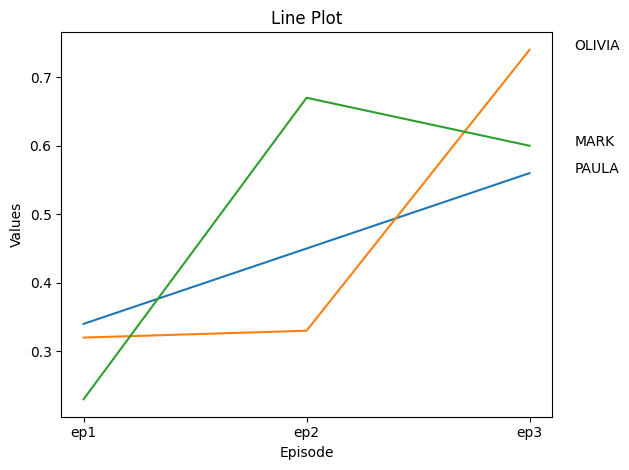

In [23]:
# Create the plot
fig, ax = plt.subplots()
for col in df.columns:
    ax.plot(df.index, df[col], label=col)
    
    # Add annotation label once
    ax.annotate(col, xy=(2, df[col][2]), xytext=(2.2, df[col][2]), fontsize=10)

# Customize the plot
ax.set_xticks(df.index)
ax.set_xticklabels(['ep1', 'ep2', 'ep3'])
ax.set_xlabel('Episode')
ax.set_ylabel('Values')
ax.set_title('Line Plot')

# Add line labels
lines = ax.get_lines()
for i, line in enumerate(lines):
    line.set_label(df.columns[i])

plt.tight_layout()
plt.show()
